# Baggage Dataset - Exploratory Data Analysis and Visualization

This notebook provides a comprehensive EDA and visualization analysis of the baggage dataset including:
- Data overview and basic statistics
- Box plots for numerical variables
- Bar plots for categorical variables
- Histograms for distribution analysis
- Correlation matrix
- Advanced visualizations and insights

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style and suppress warnings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set figure size defaults
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('baggage_dataset.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (1970, 34)

Column Names:
['flight_id', 'airline', 'origin_airport', 'destination_airport', 'departure_time', 'actual_departure_time', 'arrival_time', 'actual_arrival_time', 'weather_condition', 'number_of_bags', 'bag_weight_kg', 'connection_time_min', 'day_of_week', 'is_international', 'airport_baggage_capacity', 'pnr_id', 'pooled_passenger_count', 'bag_id', 'bag_type', 'extra_baggage', 'membership_tier', 'route', 'leg_id', 'boarding_point', 'off_point', 'check_in_time', 'check_out_time', 'travel_duration_min', 'carrier_code', 'check_in_location_id', 'airport_code', 'terminal_id', 'baggage_delayed', 'baggage_delayed_minutes']


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,flight_id,airline,origin_airport,destination_airport,departure_time,actual_departure_time,arrival_time,actual_arrival_time,weather_condition,number_of_bags,bag_weight_kg,connection_time_min,day_of_week,is_international,airport_baggage_capacity,pnr_id,pooled_passenger_count,bag_id,bag_type,extra_baggage,membership_tier,route,leg_id,boarding_point,off_point,check_in_time,check_out_time,travel_duration_min,carrier_code,check_in_location_id,airport_code,terminal_id,baggage_delayed,baggage_delayed_minutes
0,FL01750,Air India,DEL,ORD,6/11/2025 5:23,6/11/2025 5:33,6/11/2025 14:06,6/11/2025 14:16,Rain,4,5.94,45,2,0,1.05,PNR00875,3,BAG001750,Cabin,No,NaN,DEL-ORD,LEG001750,DEL,ORD,6/11/2025 4:23,6/11/2025 14:36,523,AI,Kiosk_20,ORD,T3,No,1.4
1,FL00806,IndiGo,FRA,SFO,6/8/2025 2:48,6/8/2025 2:48,6/8/2025 9:53,6/8/2025 9:53,Clear,1,16.11,45,6,1,0.90,PNR00403,1,BAG000806,Checked,No,Silver,FRA-SFO,LEG000806,FRA,SFO,6/8/2025 1:48,6/8/2025 10:15,425,6E,Kiosk_3,SFO,T2,No,9.0
2,FL01701,Air India,JFK,FRA,6/1/2025 19:59,6/1/2025 19:59,6/1/2025 21:53,6/1/2025 21:53,Rain,1,17.45,90,6,1,1.27,PNR00850,1,BAG001701,Cabin,No,Platinum,JFK-FRA,LEG001701,JFK,FRA,6/1/2025 18:59,6/1/2025 22:00,114,AI,Kiosk_14,FRA,T1,No,4.0
3,FL03711,Delta,FRA,DXB,6/25/2025 2:27,6/25/2025 2:57,6/25/2025 12:19,6/25/2025 12:29,Clear,1,8.42,0,2,1,0.82,PNR01855,2,BAG003711,Checked,Yes,Silver,FRA-DXB,LEG003711,FRA,DXB,6/25/2025 1:27,6/25/2025 12:34,592,DL,Kiosk_18,DXB,T3,No,2.7
4,FL04181,Air India,BLR,DXB,6/23/2025 11:37,6/23/2025 11:37,6/23/2025 22:06,6/23/2025 22:06,Clear,4,49.82,90,0,1,1.16,PNR02090,2,BAG004181,Cabin,No,NaN,BLR-DXB,LEG004181,BLR,DXB,6/23/2025 10:37,6/23/2025 22:13,629,AI,Kiosk_17,DXB,T5,Yes,82.7


In [4]:
# Basic information about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   flight_id                 1970 non-null   object 
 1   airline                   1970 non-null   object 
 2   origin_airport            1970 non-null   object 
 3   destination_airport       1970 non-null   object 
 4   departure_time            1970 non-null   object 
 5   actual_departure_time     1970 non-null   object 
 6   arrival_time              1970 non-null   object 
 7   actual_arrival_time       1970 non-null   object 
 8   weather_condition         1970 non-null   object 
 9   number_of_bags            1970 non-null   int64  
 10  bag_weight_kg             1970 non-null   float64
 11  connection_time_min       1970 non-null   int64  
 12  day_of_week               1970 non-null   int64  
 13  is_international          1970 non-null   int64  

In [5]:
# Check for missing values
print("Missing Values:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

Missing Values:


,Missing Count,Percentage
membership_tier,512,25.989848


In [6]:
# Basic statistical summary
print("Statistical Summary for Numerical Variables:")
df.describe()

Statistical Summary for Numerical Variables:


,number_of_bags,bag_weight_kg,connection_time_min,day_of_week,is_international,airport_baggage_capacity,pooled_passenger_count,travel_duration_min,baggage_delayed_minutes
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000
mean,2.612183,39.269051,43.279188,3.012690,0.697970,1.001076,1.995431,392.704061,25.740000
std,1.389160,25.352961,30.871187,2.097265,0.459255,0.294449,0.812847,192.235530,32.911218
min,1.000000,-4.830000,0.000000,0.000000,0.000000,0.500000,1.000000,60.000000,0.000000
25%,1.000000,18.737500,15.000000,1.000000,0.000000,0.740000,1.000000,226.250000,1.700000
50%,2.000000,33.565000,45.000000,3.000000,1.000000,0.990000,2.000000,392.000000,6.300000
75%,4.000000,53.430000,60.000000,5.000000,1.000000,1.260000,3.000000,561.000000,46.400000
max,5.000000,153.440000,90.000000,6.000000,1.000000,1.500000,3.000000,720.000000,180.500000


## 2. Data Preprocessing

In [7]:
# Convert date columns to datetime
date_columns = ['departure_time', 'actual_departure_time', 'arrival_time', 'actual_arrival_time', 
                'check_in_time', 'check_out_time']

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")

Numerical columns (9): ['number_of_bags', 'bag_weight_kg', 'connection_time_min', 'day_of_week', 'is_international', 'airport_baggage_capacity', 'pooled_passenger_count', 'travel_duration_min', 'baggage_delayed_minutes']

Categorical columns (19): ['flight_id', 'airline', 'origin_airport', 'destination_airport', 'weather_condition', 'pnr_id', 'bag_id', 'bag_type', 'extra_baggage', 'membership_tier', 'route', 'leg_id', 'boarding_point', 'off_point', 'carrier_code', 'check_in_location_id', 'airport_code', 'terminal_id', 'baggage_delayed']


## 3. Box Plots for Numerical Variables

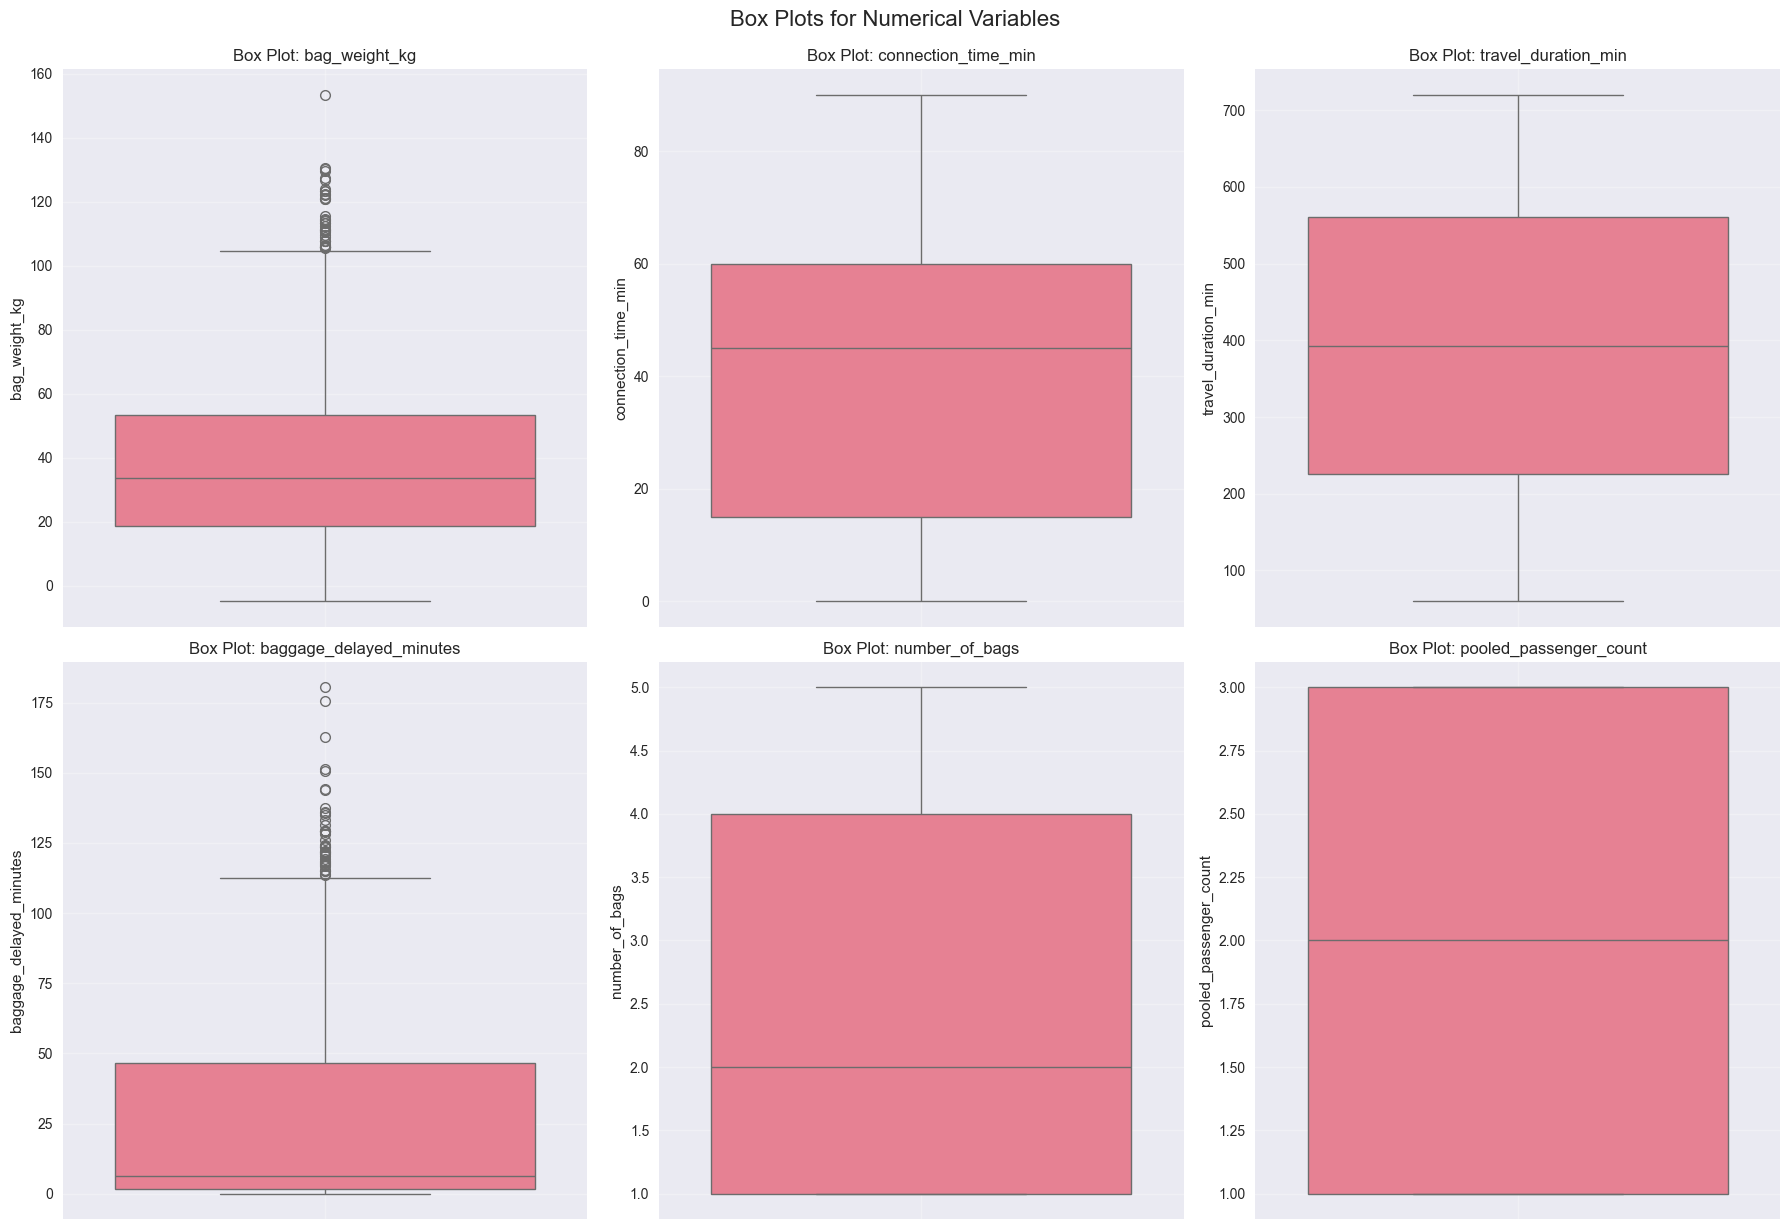

In [8]:
# Create box plots for key numerical variables
key_numerical = ['bag_weight_kg', 'connection_time_min', 'travel_duration_min', 
                 'baggage_delayed_minutes', 'number_of_bags', 'pooled_passenger_count']

# Filter existing columns
available_numerical = [col for col in key_numerical if col in df.columns]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(available_numerical):
    if i < len(axes):
        sns.boxplot(data=df, y=col, ax=axes[i])
        axes[i].set_title(f'Box Plot: {col}')
        axes[i].grid(True, alpha=0.3)

# Remove empty subplots
for i in range(len(available_numerical), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Box Plots for Numerical Variables', fontsize=16, y=1.02)
plt.show()

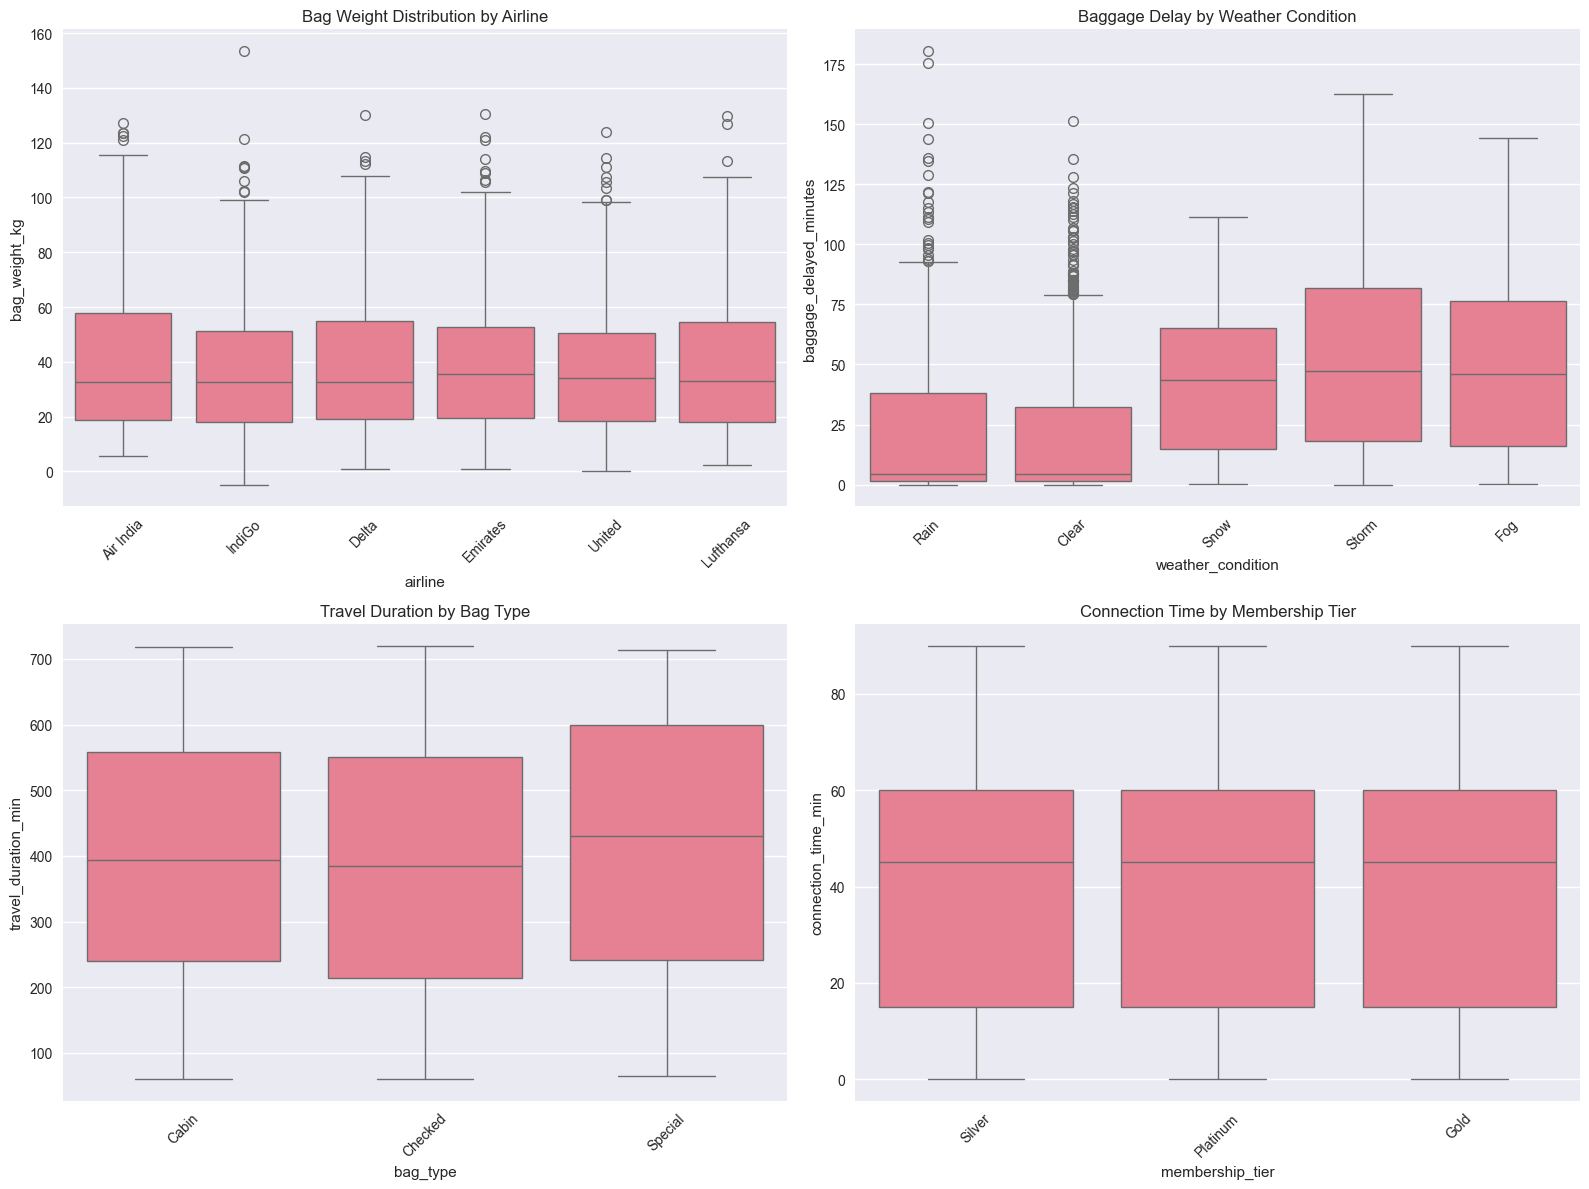

In [9]:
# Box plots by categorical variables
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Box plot of bag weight by airline
sns.boxplot(data=df, x='airline', y='bag_weight_kg', ax=axes[0,0])
axes[0,0].set_title('Bag Weight Distribution by Airline')
axes[0,0].tick_params(axis='x', rotation=45)

# Box plot of baggage delay by weather condition
sns.boxplot(data=df, x='weather_condition', y='baggage_delayed_minutes', ax=axes[0,1])
axes[0,1].set_title('Baggage Delay by Weather Condition')
axes[0,1].tick_params(axis='x', rotation=45)

# Box plot of travel duration by bag type
sns.boxplot(data=df, x='bag_type', y='travel_duration_min', ax=axes[1,0])
axes[1,0].set_title('Travel Duration by Bag Type')
axes[1,0].tick_params(axis='x', rotation=45)

# Box plot of connection time by membership tier
sns.boxplot(data=df, x='membership_tier', y='connection_time_min', ax=axes[1,1])
axes[1,1].set_title('Connection Time by Membership Tier')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 4. Bar Plots for Categorical Variables

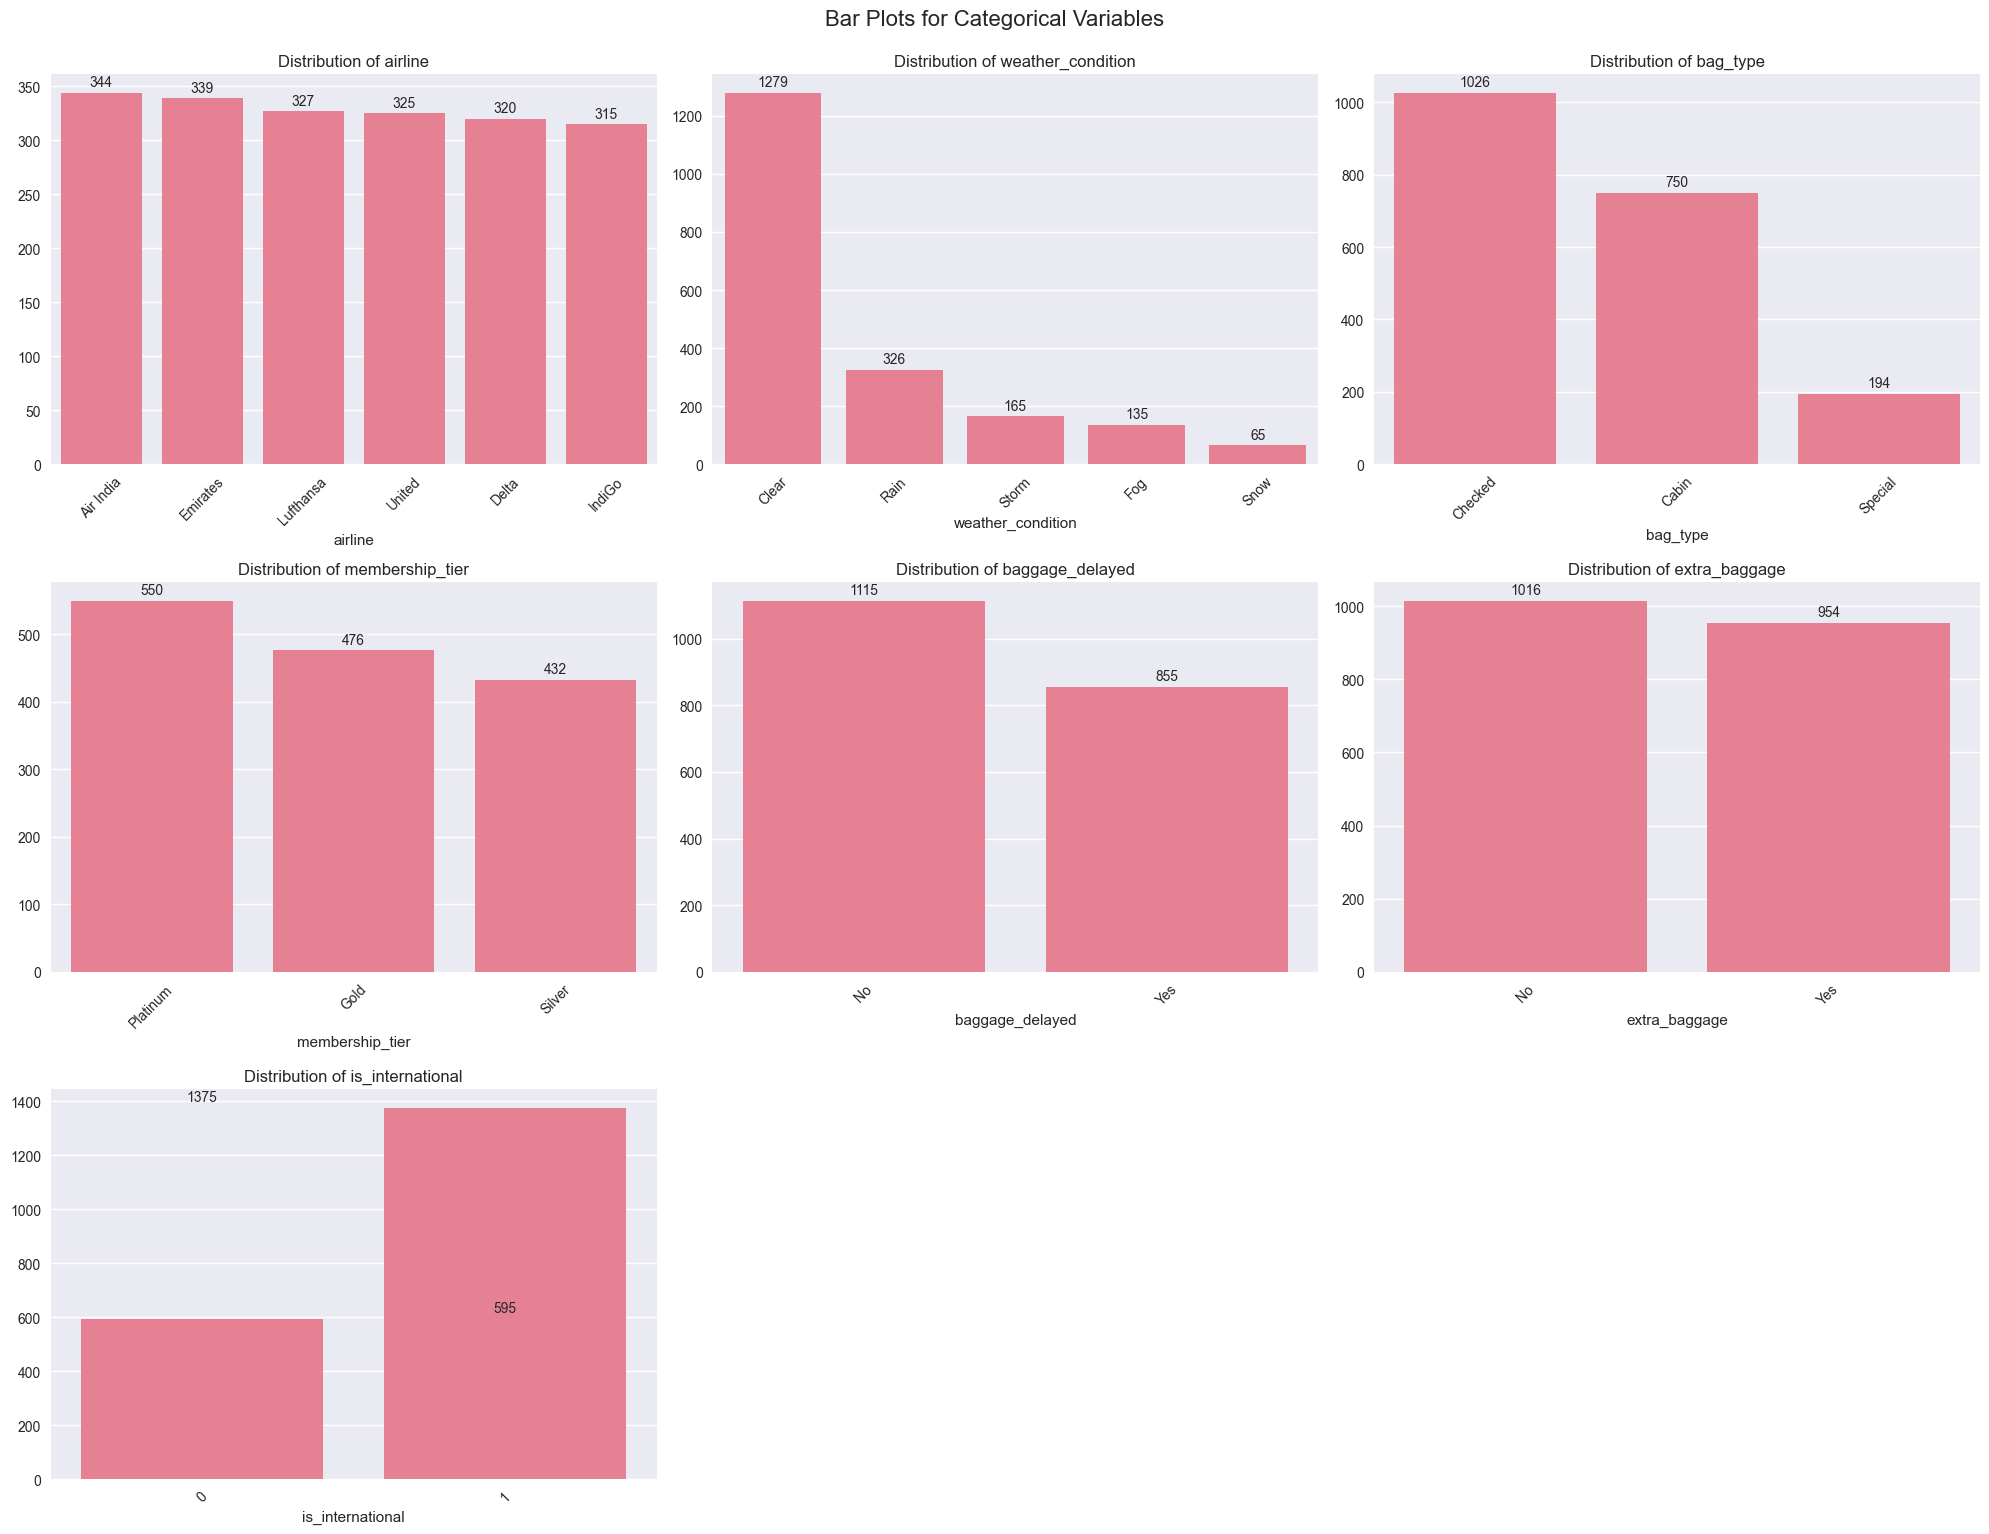

In [10]:
# Bar plots for key categorical variables
categorical_vars = ['airline', 'weather_condition', 'bag_type', 'membership_tier', 
                   'baggage_delayed', 'extra_baggage', 'is_international']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(categorical_vars):
    if col in df.columns and i < len(axes):
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for j, v in enumerate(value_counts.values):
            axes[i].text(j, v + max(value_counts.values) * 0.01, str(v), 
                        ha='center', va='bottom')

# Remove empty subplots
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Bar Plots for Categorical Variables', fontsize=16, y=1.02)
plt.show()

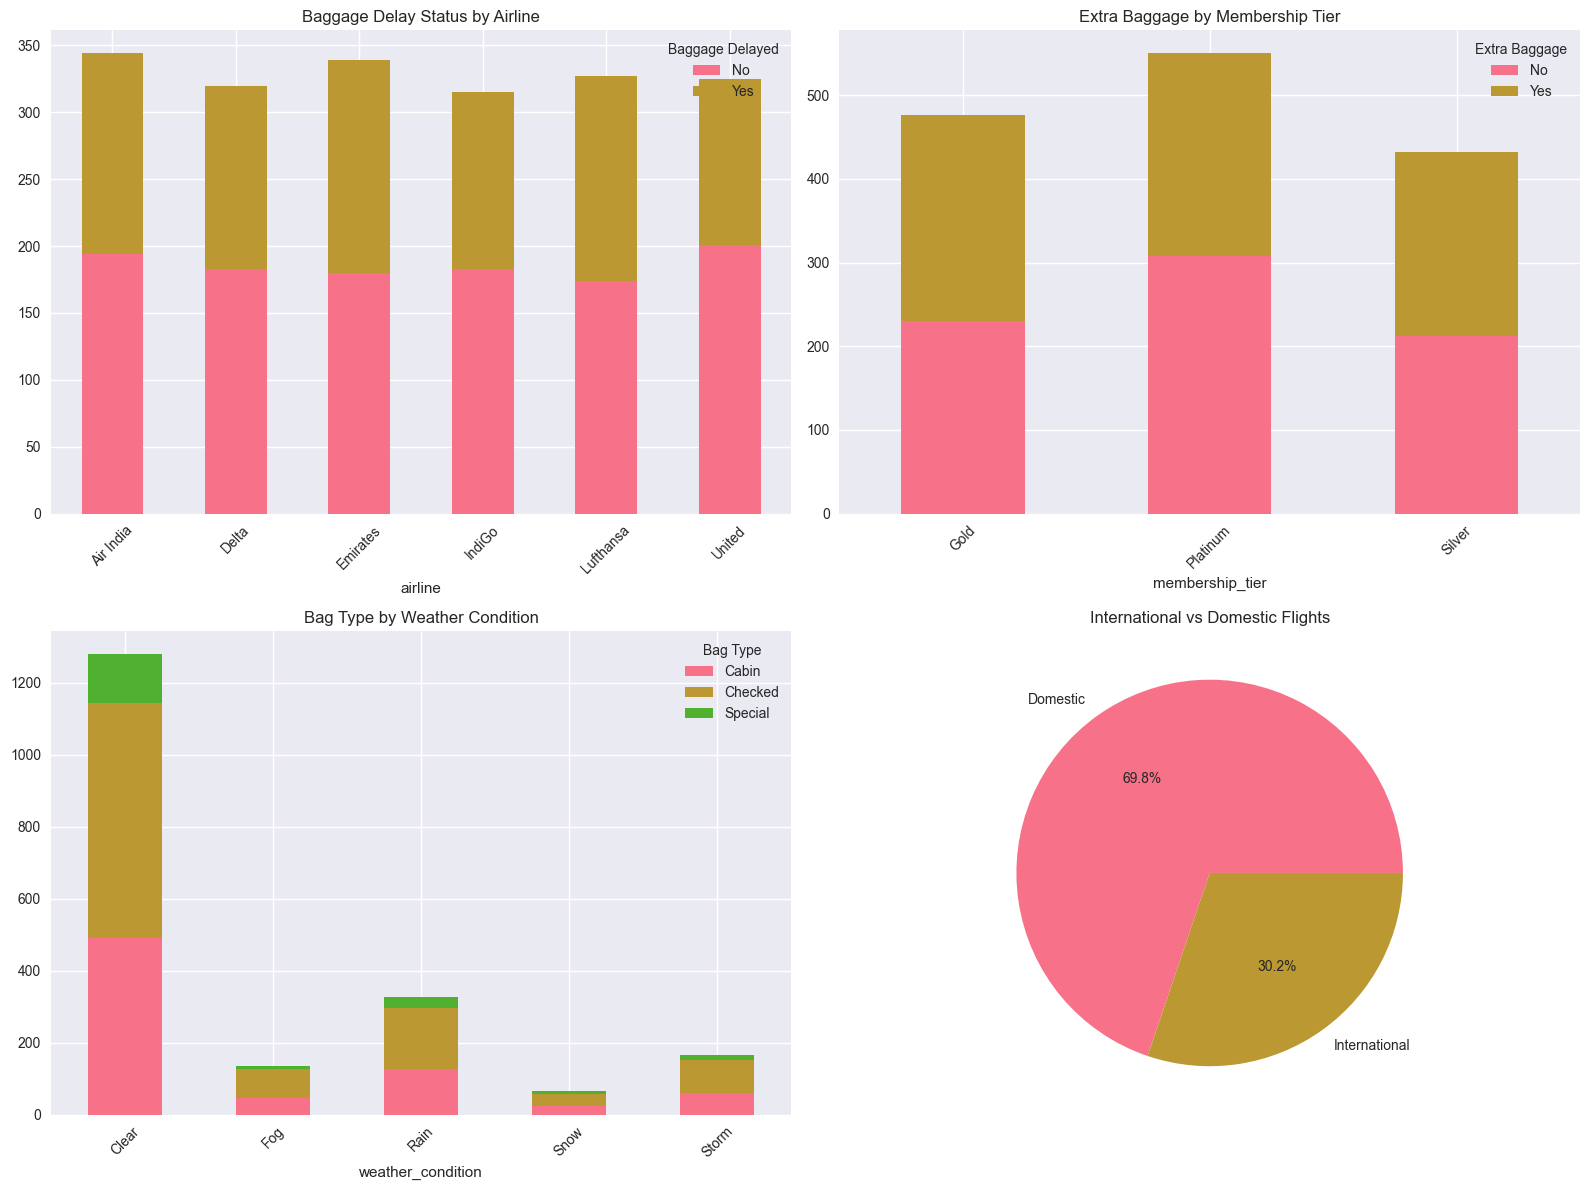

In [11]:
# Stacked bar plots for relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Baggage delay by airline
delay_by_airline = pd.crosstab(df['airline'], df['baggage_delayed'])
delay_by_airline.plot(kind='bar', stacked=True, ax=axes[0,0])
axes[0,0].set_title('Baggage Delay Status by Airline')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].legend(title='Baggage Delayed')

# Extra baggage by membership tier
extra_by_tier = pd.crosstab(df['membership_tier'], df['extra_baggage'])
extra_by_tier.plot(kind='bar', stacked=True, ax=axes[0,1])
axes[0,1].set_title('Extra Baggage by Membership Tier')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].legend(title='Extra Baggage')

# Bag type by weather condition
bag_by_weather = pd.crosstab(df['weather_condition'], df['bag_type'])
bag_by_weather.plot(kind='bar', stacked=True, ax=axes[1,0])
axes[1,0].set_title('Bag Type by Weather Condition')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Bag Type')

# International vs domestic flights
intl_counts = df['is_international'].value_counts()
axes[1,1].pie(intl_counts.values, labels=['Domestic', 'International'], autopct='%1.1f%%')
axes[1,1].set_title('International vs Domestic Flights')

plt.tight_layout()
plt.show()

## 5. Histograms for Distribution Analysis

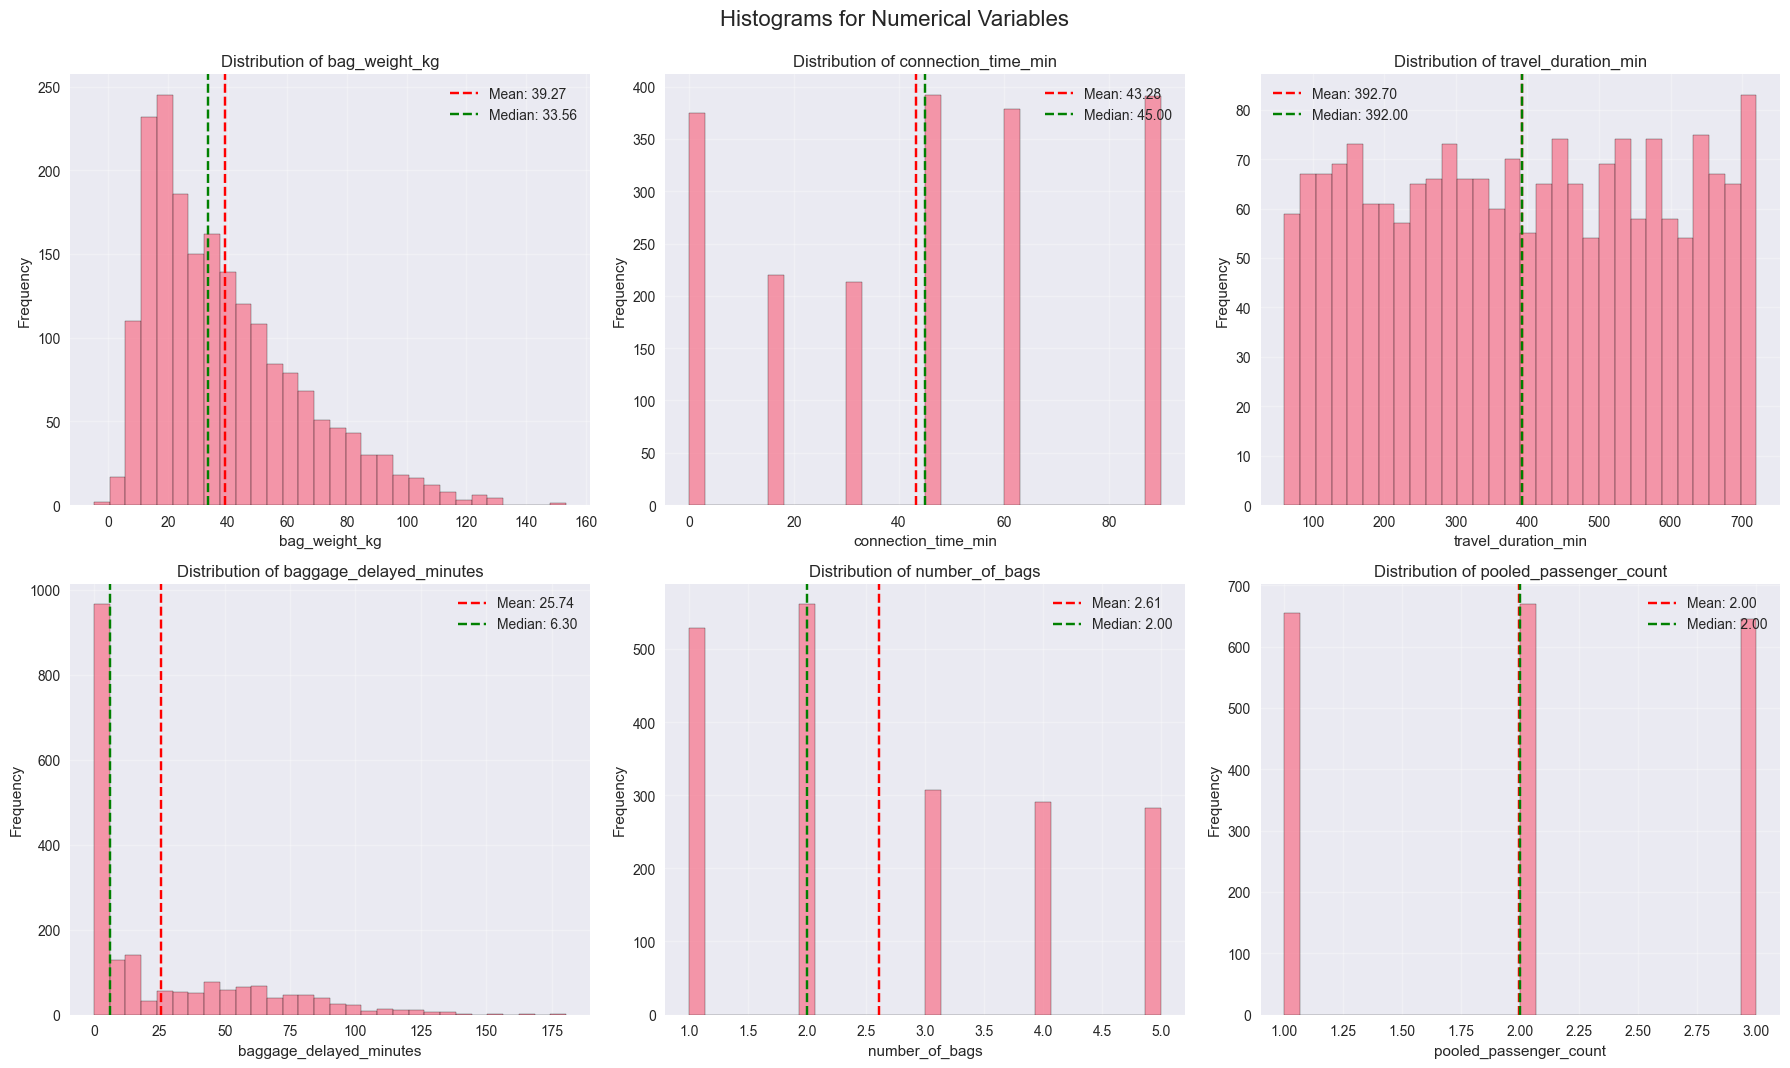

In [12]:
# Histograms for numerical variables
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for i, col in enumerate(available_numerical):
    if i < len(axes):
        df[col].hist(bins=30, ax=axes[i], alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].grid(True, alpha=0.3)
        
        # Add statistics
        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
        axes[i].legend()

# Remove empty subplots
for i in range(len(available_numerical), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Histograms for Numerical Variables', fontsize=16, y=1.02)
plt.show()

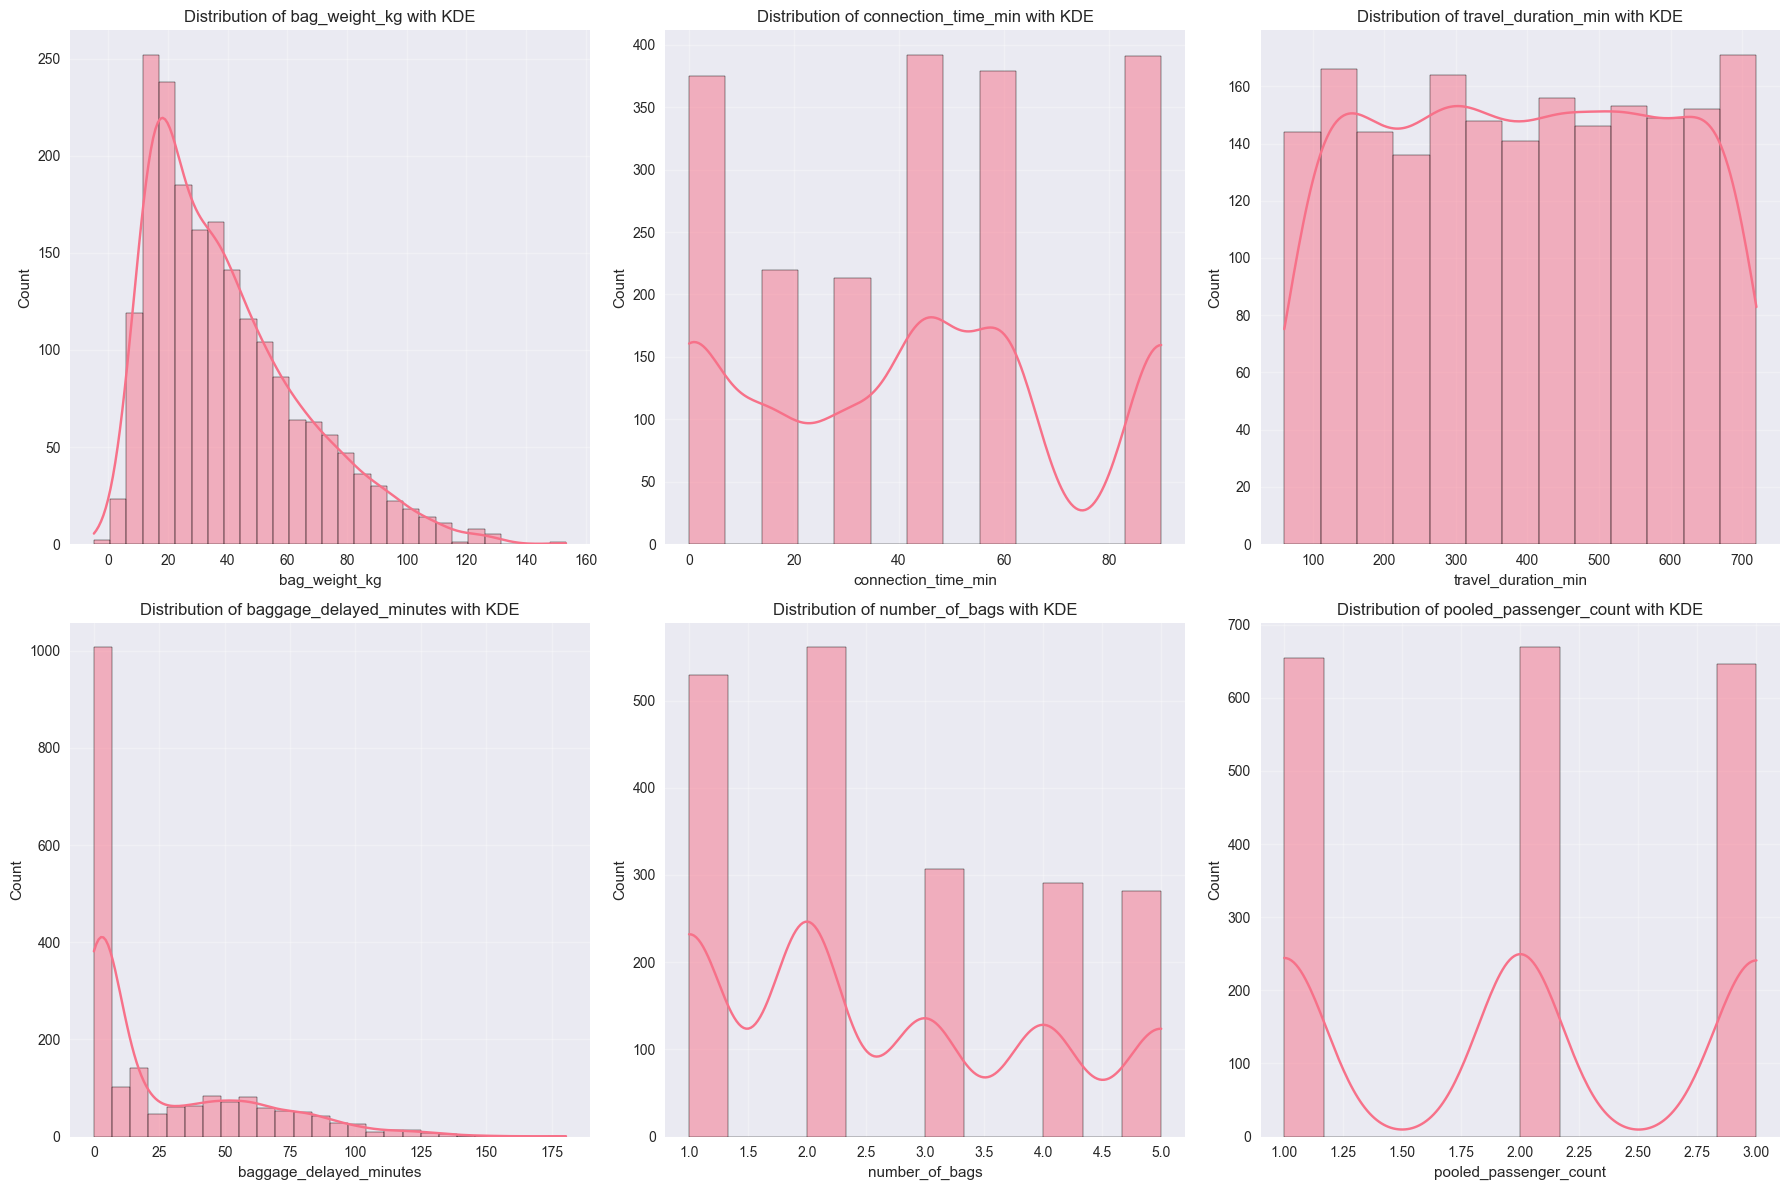

In [13]:
# Distribution plots with KDE
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(available_numerical[:6]):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} with KDE')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Correlation Matrix Analysis

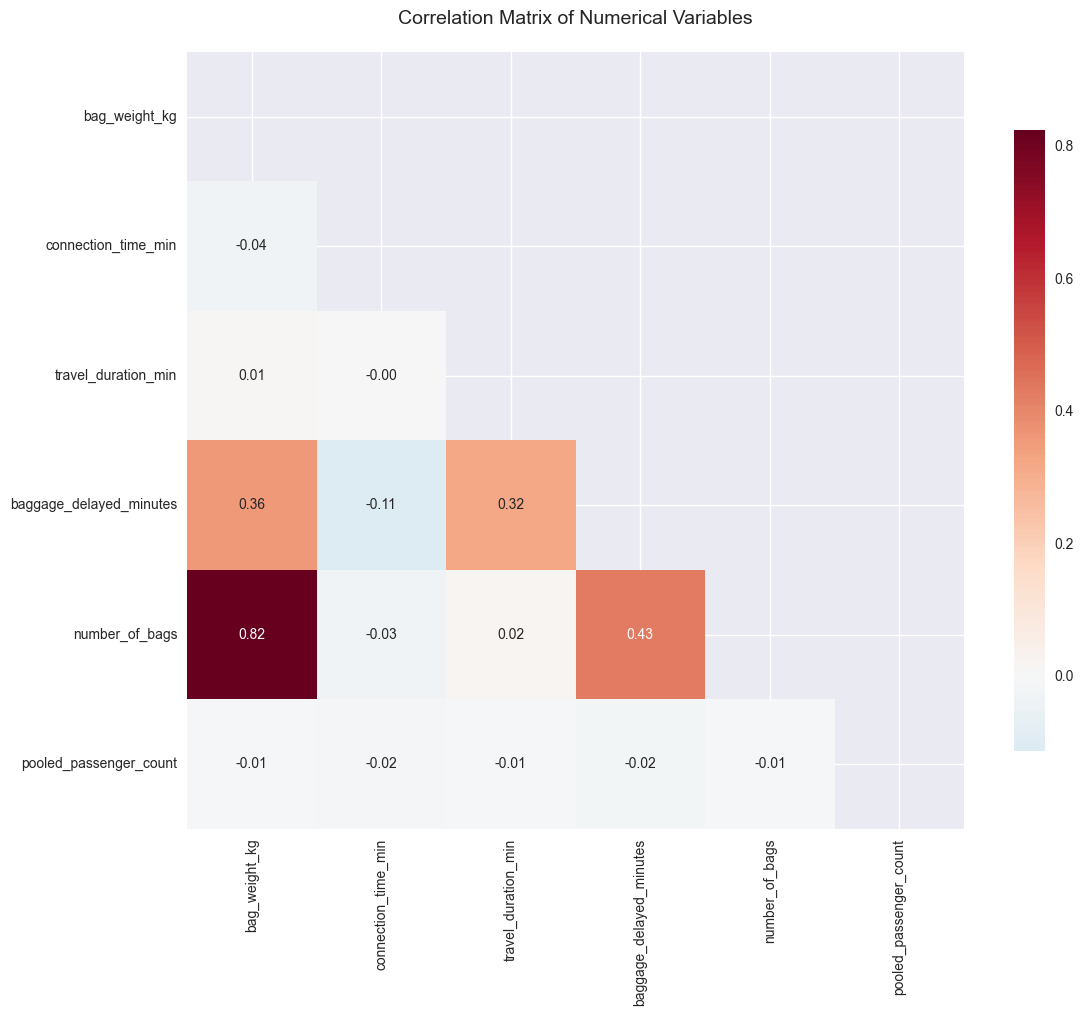

In [14]:
# Calculate correlation matrix for numerical variables
correlation_matrix = df[available_numerical].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [15]:
# Find highly correlated pairs
def find_high_correlations(corr_matrix, threshold=0.7):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                high_corr_pairs.append({
                    'Variable 1': corr_matrix.columns[i],
                    'Variable 2': corr_matrix.columns[j],
                    'Correlation': corr_matrix.iloc[i, j]
                })
    return pd.DataFrame(high_corr_pairs)

high_corr_df = find_high_correlations(correlation_matrix, 0.5)
if not high_corr_df.empty:
    print("High Correlation Pairs (|correlation| >= 0.5):")
    print(high_corr_df.sort_values('Correlation', key=abs, ascending=False))
else:
    print("No high correlation pairs found with threshold >= 0.5")

High Correlation Pairs (|correlation| >= 0.5):
      Variable 1      Variable 2  Correlation
0  bag_weight_kg  number_of_bags     0.824782


## 7. Advanced Visualizations and Insights

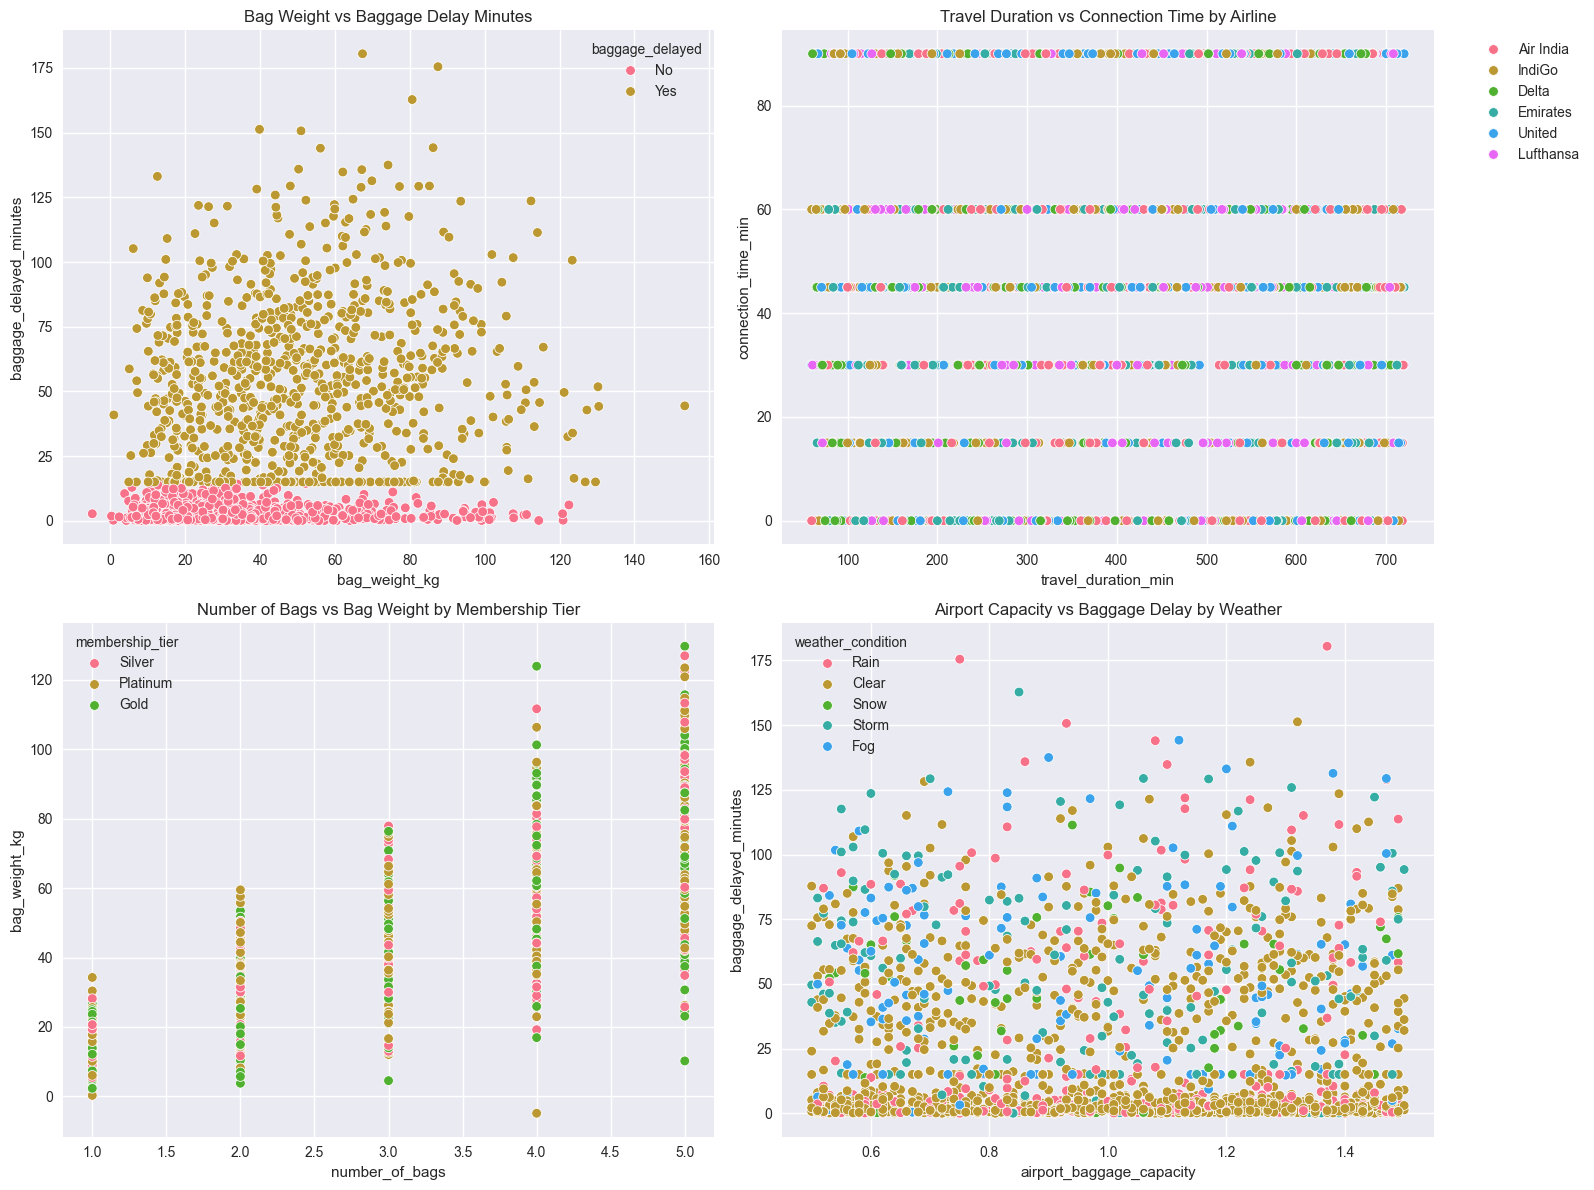

In [16]:
# Scatter plots for key relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Bag weight vs baggage delay
sns.scatterplot(data=df, x='bag_weight_kg', y='baggage_delayed_minutes', 
                hue='baggage_delayed', ax=axes[0,0])
axes[0,0].set_title('Bag Weight vs Baggage Delay Minutes')

# Travel duration vs connection time
sns.scatterplot(data=df, x='travel_duration_min', y='connection_time_min', 
                hue='airline', ax=axes[0,1])
axes[0,1].set_title('Travel Duration vs Connection Time by Airline')
axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Number of bags vs bag weight
sns.scatterplot(data=df, x='number_of_bags', y='bag_weight_kg', 
                hue='membership_tier', ax=axes[1,0])
axes[1,0].set_title('Number of Bags vs Bag Weight by Membership Tier')

# Airport capacity vs baggage delay
sns.scatterplot(data=df, x='airport_baggage_capacity', y='baggage_delayed_minutes', 
                hue='weather_condition', ax=axes[1,1])
axes[1,1].set_title('Airport Capacity vs Baggage Delay by Weather')

plt.tight_layout()
plt.show()

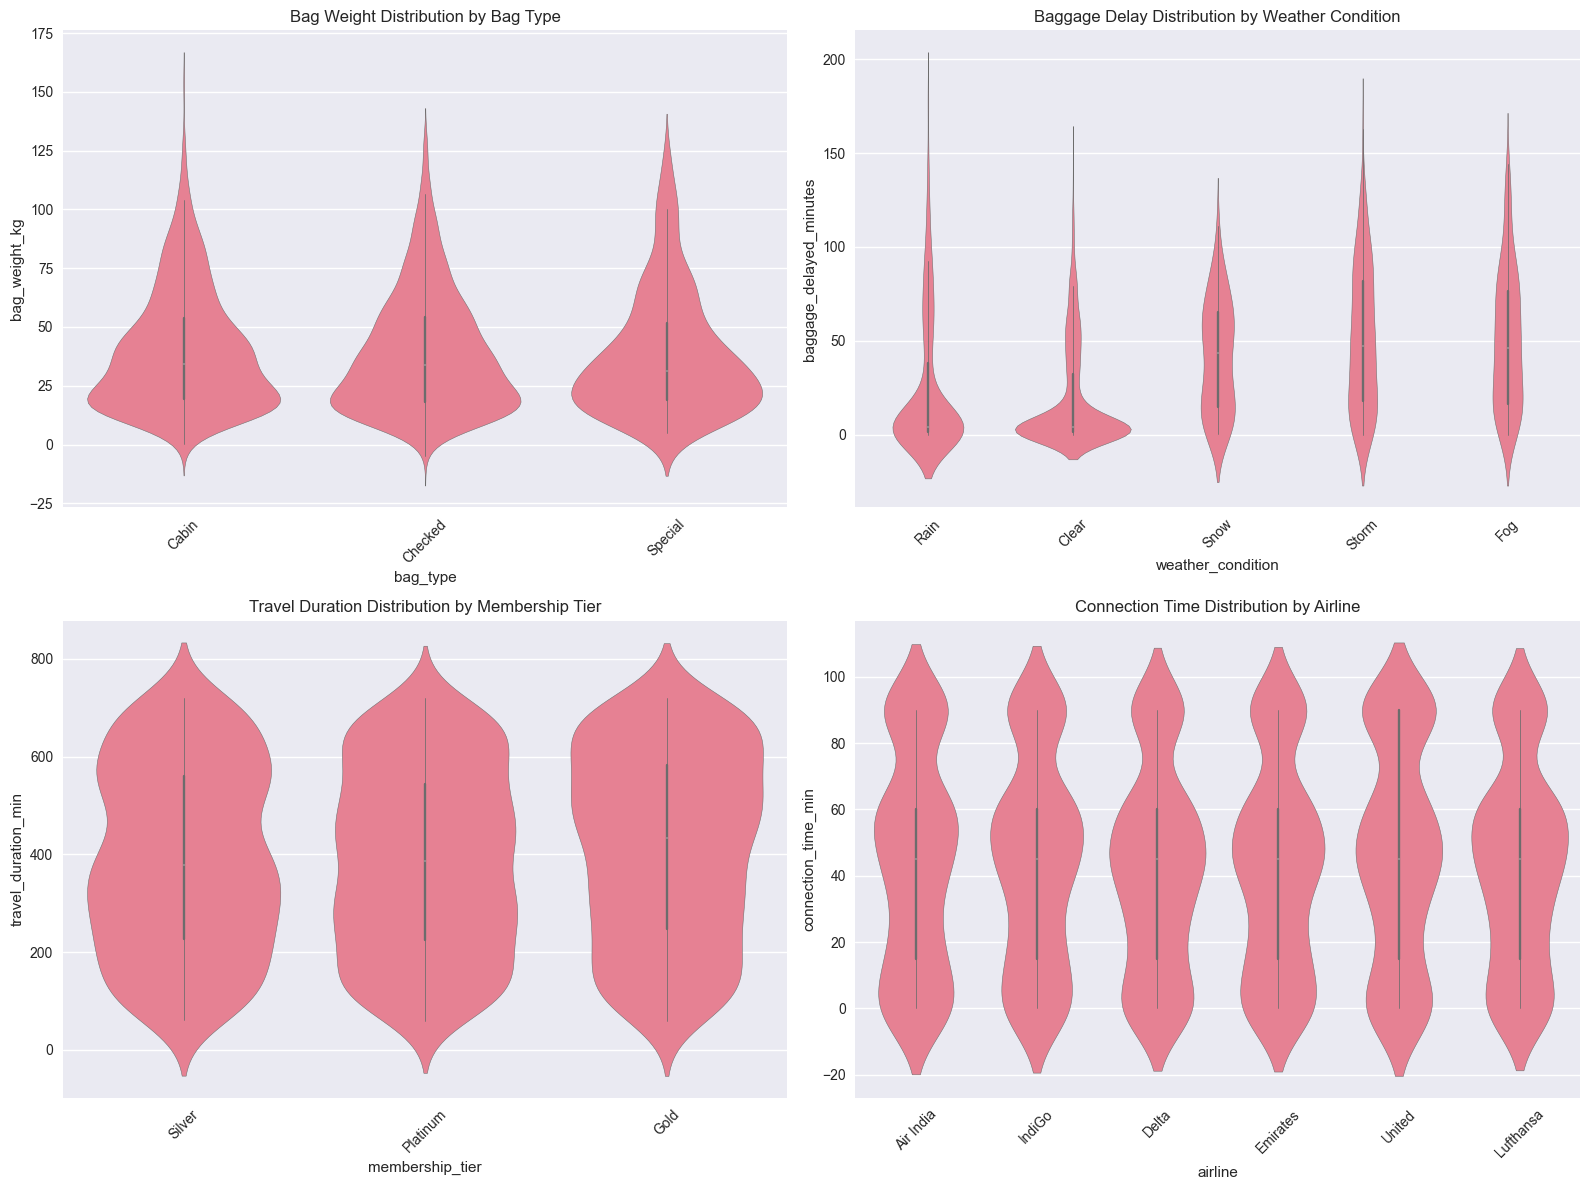

In [17]:
# Violin plots for distribution comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Bag weight distribution by bag type
sns.violinplot(data=df, x='bag_type', y='bag_weight_kg', ax=axes[0,0])
axes[0,0].set_title('Bag Weight Distribution by Bag Type')
axes[0,0].tick_params(axis='x', rotation=45)

# Baggage delay distribution by weather
sns.violinplot(data=df, x='weather_condition', y='baggage_delayed_minutes', ax=axes[0,1])
axes[0,1].set_title('Baggage Delay Distribution by Weather Condition')
axes[0,1].tick_params(axis='x', rotation=45)

# Travel duration by membership tier
sns.violinplot(data=df, x='membership_tier', y='travel_duration_min', ax=axes[1,0])
axes[1,0].set_title('Travel Duration Distribution by Membership Tier')
axes[1,0].tick_params(axis='x', rotation=45)

# Connection time by airline
sns.violinplot(data=df, x='airline', y='connection_time_min', ax=axes[1,1])
axes[1,1].set_title('Connection Time Distribution by Airline')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 8. Time Series Analysis

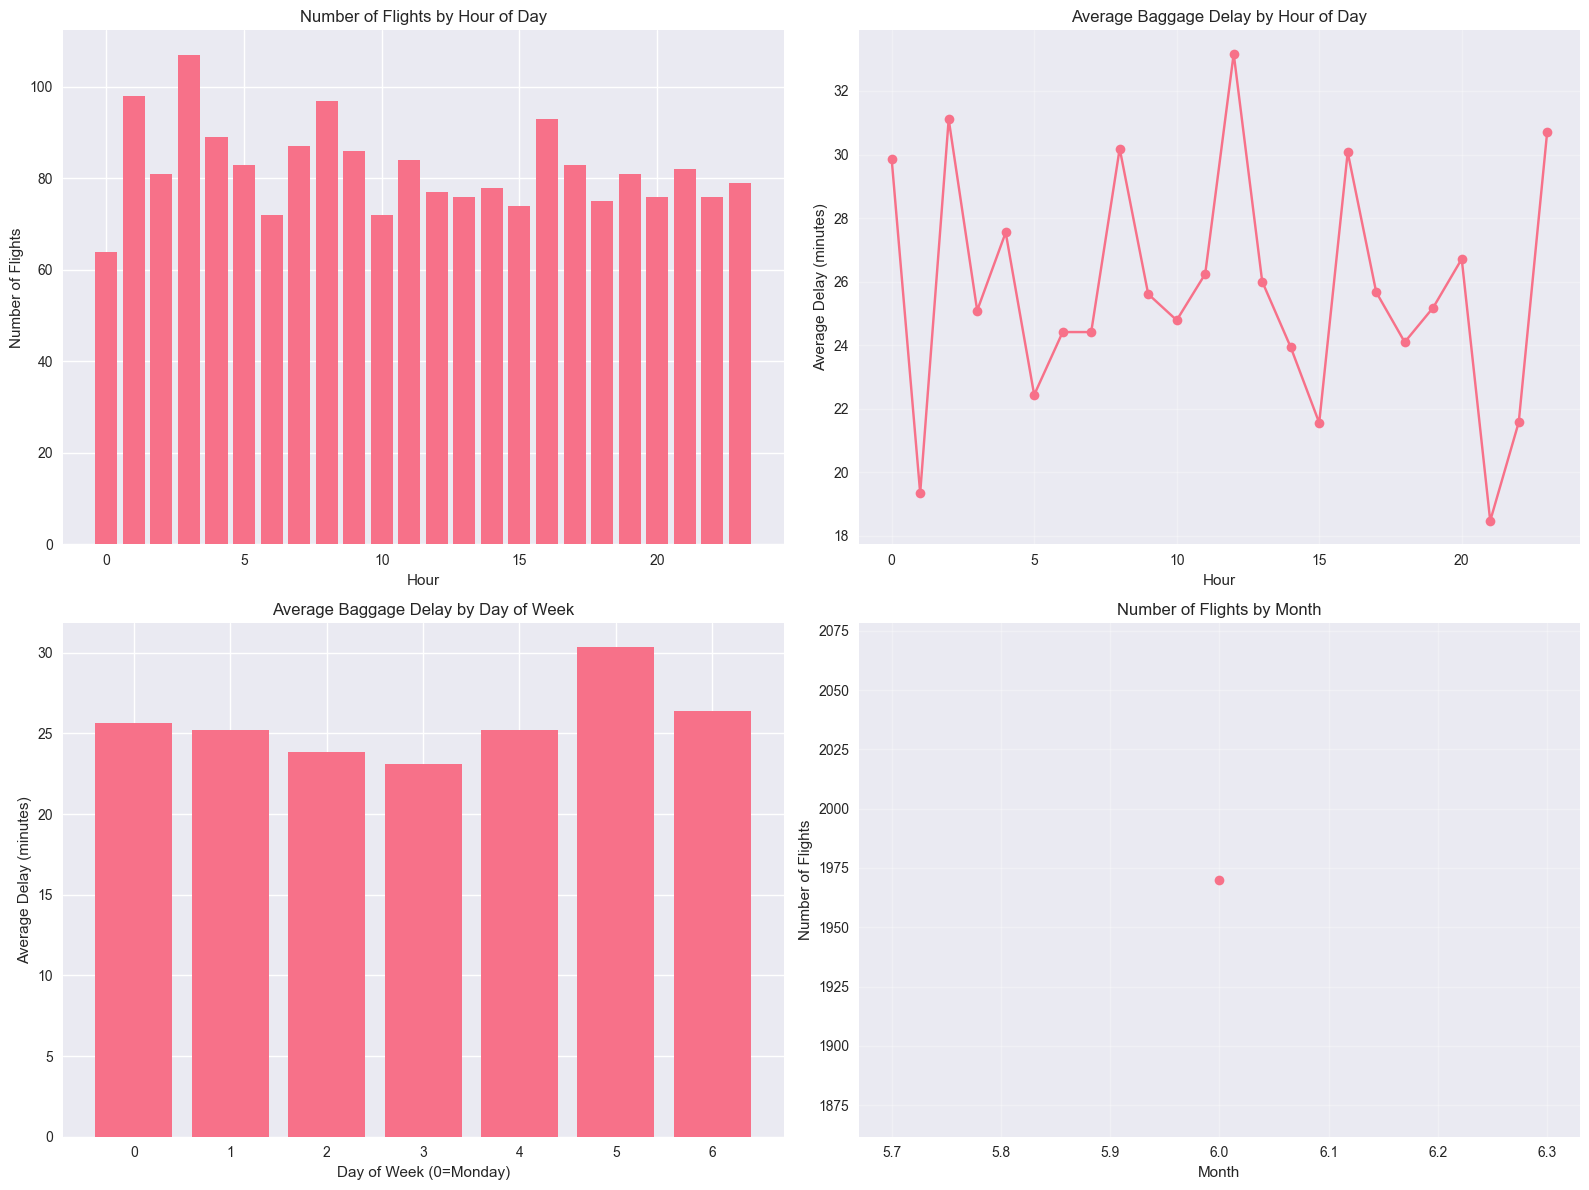

In [18]:
# Extract time-based features
if 'departure_time' in df.columns:
    df['departure_hour'] = df['departure_time'].dt.hour
    df['departure_day'] = df['departure_time'].dt.day
    df['departure_month'] = df['departure_time'].dt.month
    
    # Time-based analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Flights by hour of day
    hourly_flights = df['departure_hour'].value_counts().sort_index()
    axes[0,0].bar(hourly_flights.index, hourly_flights.values)
    axes[0,0].set_title('Number of Flights by Hour of Day')
    axes[0,0].set_xlabel('Hour')
    axes[0,0].set_ylabel('Number of Flights')
    
    # Baggage delays by hour
    hourly_delays = df.groupby('departure_hour')['baggage_delayed_minutes'].mean()
    axes[0,1].plot(hourly_delays.index, hourly_delays.values, marker='o')
    axes[0,1].set_title('Average Baggage Delay by Hour of Day')
    axes[0,1].set_xlabel('Hour')
    axes[0,1].set_ylabel('Average Delay (minutes)')
    axes[0,1].grid(True, alpha=0.3)
    
    # Day of week analysis
    dow_delays = df.groupby('day_of_week')['baggage_delayed_minutes'].mean()
    axes[1,0].bar(dow_delays.index, dow_delays.values)
    axes[1,0].set_title('Average Baggage Delay by Day of Week')
    axes[1,0].set_xlabel('Day of Week (0=Monday)')
    axes[1,0].set_ylabel('Average Delay (minutes)')
    
    # Monthly trend
    monthly_flights = df['departure_month'].value_counts().sort_index()
    axes[1,1].plot(monthly_flights.index, monthly_flights.values, marker='o')
    axes[1,1].set_title('Number of Flights by Month')
    axes[1,1].set_xlabel('Month')
    axes[1,1].set_ylabel('Number of Flights')
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 9. Key Insights and Summary Statistics

In [19]:
# Summary statistics and insights
print("=== KEY INSIGHTS FROM BAGGAGE DATASET ===")
print(f"\nDataset Overview:")
print(f"- Total records: {len(df):,}")
print(f"- Total airlines: {df['airline'].nunique()}")
print(f"- Unique airports: {df['origin_airport'].nunique() + df['destination_airport'].nunique()}")
print(f"- Date range: {df['departure_time'].min()} to {df['departure_time'].max()}")

print(f"\nBaggage Statistics:")
print(f"- Average bag weight: {df['bag_weight_kg'].mean():.2f} kg")
print(f"- Average number of bags: {df['number_of_bags'].mean():.2f}")
print(f"- Baggage delay rate: {(df['baggage_delayed'] == 'Yes').mean()*100:.1f}%")
print(f"- Average delay time: {df['baggage_delayed_minutes'].mean():.2f} minutes")

print(f"\nFlight Statistics:")
print(f"- International flights: {(df['is_international'] == 1).mean()*100:.1f}%")
print(f"- Average travel duration: {df['travel_duration_min'].mean():.0f} minutes")
print(f"- Average connection time: {df['connection_time_min'].mean():.0f} minutes")

print(f"\nTop Airlines by Flight Count:")
top_airlines = df['airline'].value_counts().head()
for airline, count in top_airlines.items():
    print(f"- {airline}: {count:,} flights")

print(f"\nBaggage Delay by Weather Condition:")
weather_delays = df.groupby('weather_condition')['baggage_delayed_minutes'].mean().sort_values(ascending=False)
for weather, delay in weather_delays.items():
    print(f"- {weather}: {delay:.1f} minutes average delay")

=== KEY INSIGHTS FROM BAGGAGE DATASET ===

Dataset Overview:
- Total records: 1,970
- Total airlines: 6
- Unique airports: 16
- Date range: 2025-06-01 01:34:00 to 2025-06-30 23:38:00

Baggage Statistics:
- Average bag weight: 39.27 kg
- Average number of bags: 2.61
- Baggage delay rate: 43.4%
- Average delay time: 25.74 minutes

Flight Statistics:
- International flights: 69.8%
- Average travel duration: 393 minutes
- Average connection time: 43 minutes

Top Airlines by Flight Count:
- Air India: 344 flights
- Emirates: 339 flights
- Lufthansa: 327 flights
- United: 325 flights
- Delta: 320 flights

Baggage Delay by Weather Condition:
- Storm: 51.5 minutes average delay
- Fog: 51.1 minutes average delay
- Snow: 41.4 minutes average delay
- Rain: 24.5 minutes average delay
- Clear: 19.3 minutes average delay


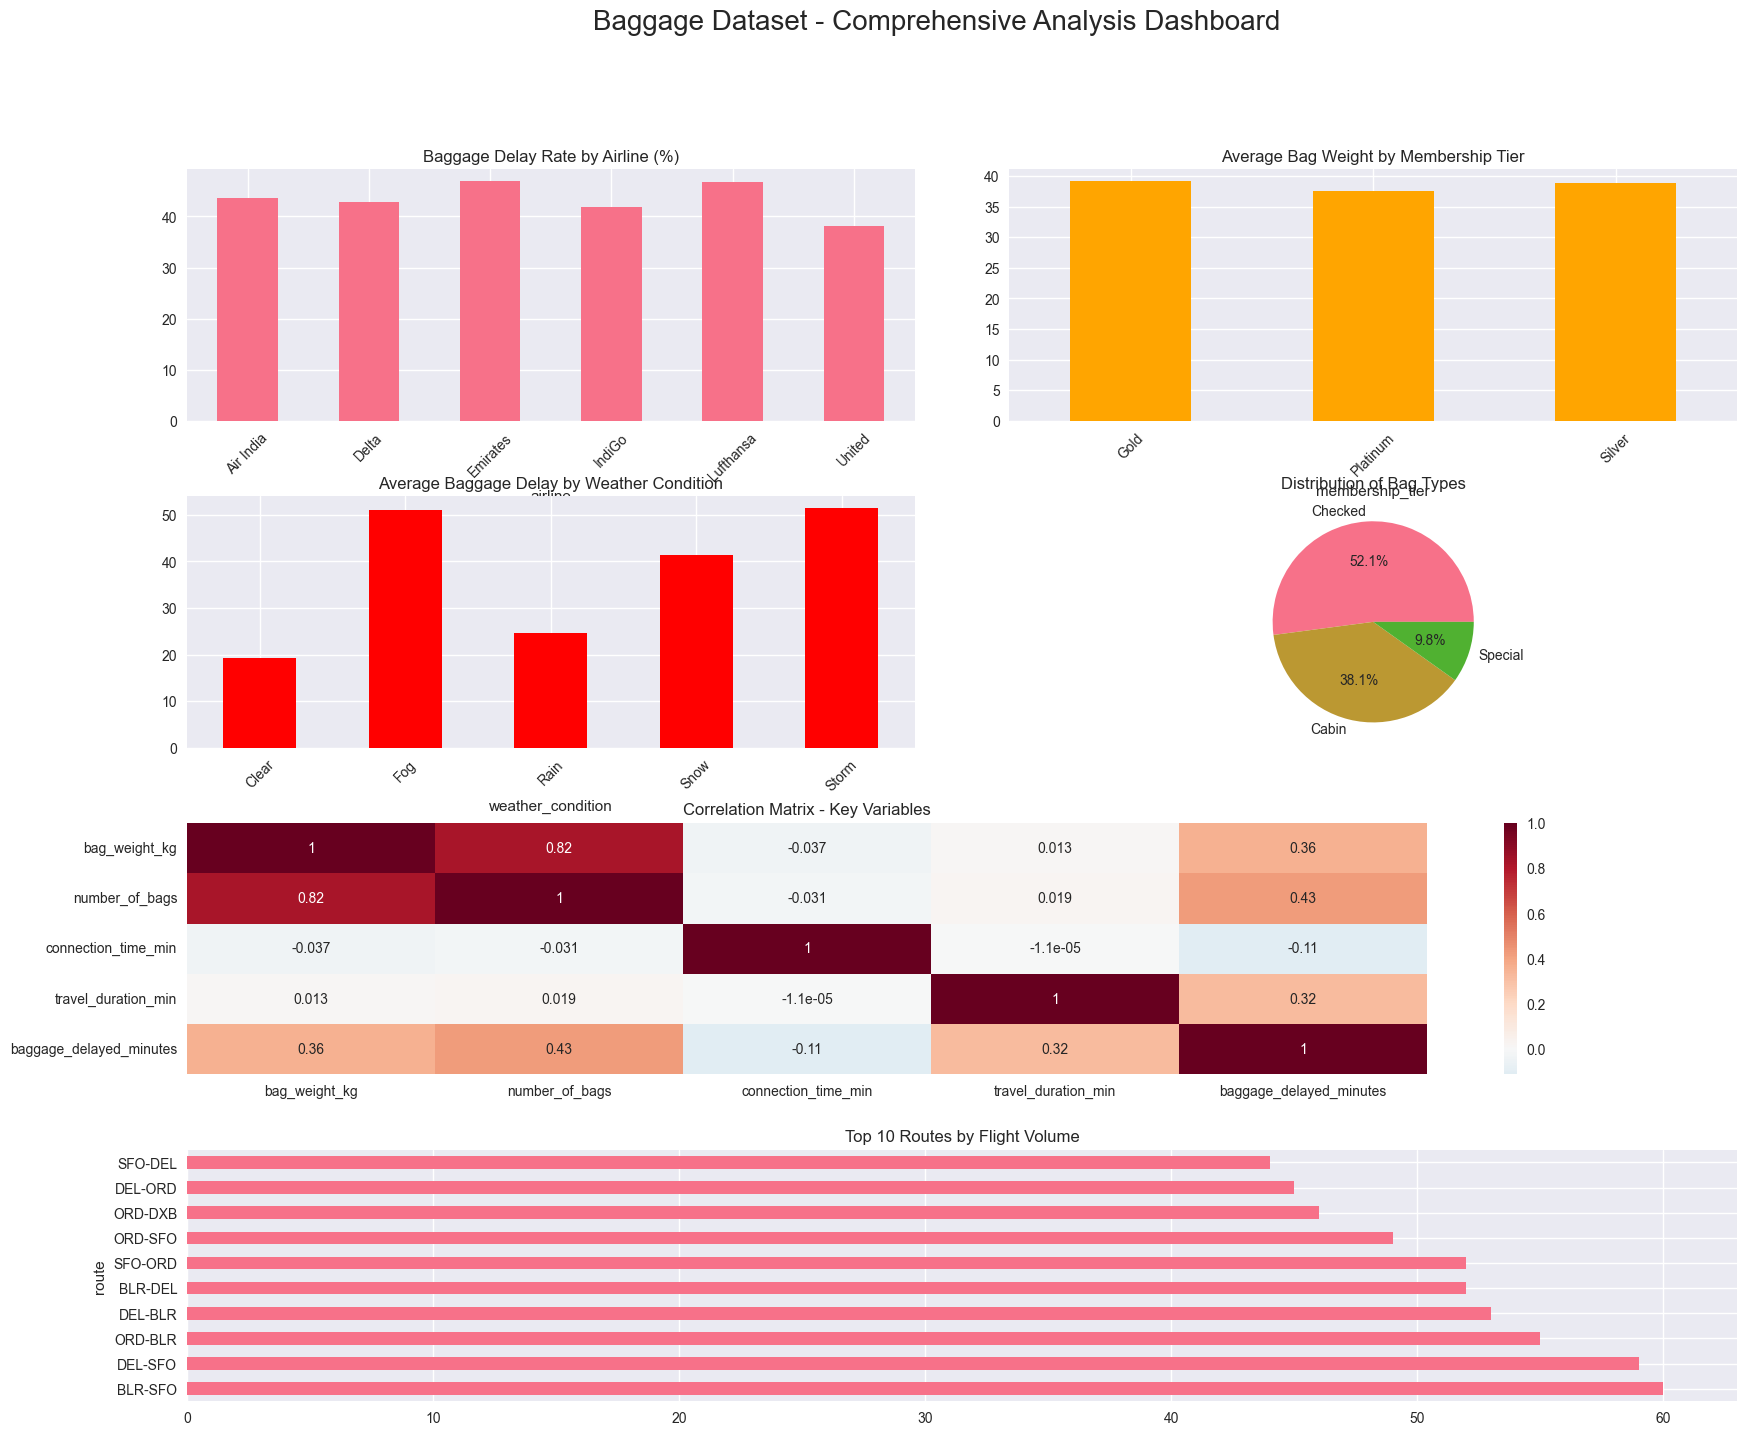

In [20]:
# Create a comprehensive summary dashboard
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

# 1. Baggage delay rate by airline
ax1 = fig.add_subplot(gs[0, :2])
delay_rate_by_airline = df.groupby('airline')['baggage_delayed'].apply(lambda x: (x == 'Yes').mean() * 100)
delay_rate_by_airline.plot(kind='bar', ax=ax1)
ax1.set_title('Baggage Delay Rate by Airline (%)')
ax1.tick_params(axis='x', rotation=45)

# 2. Average bag weight by membership tier
ax2 = fig.add_subplot(gs[0, 2:])
avg_weight_by_tier = df.groupby('membership_tier')['bag_weight_kg'].mean()
avg_weight_by_tier.plot(kind='bar', ax=ax2, color='orange')
ax2.set_title('Average Bag Weight by Membership Tier')
ax2.tick_params(axis='x', rotation=45)

# 3. Weather impact on delays
ax3 = fig.add_subplot(gs[1, :2])
weather_impact = df.groupby('weather_condition')['baggage_delayed_minutes'].mean()
weather_impact.plot(kind='bar', ax=ax3, color='red')
ax3.set_title('Average Baggage Delay by Weather Condition')
ax3.tick_params(axis='x', rotation=45)

# 4. Bag type distribution
ax4 = fig.add_subplot(gs[1, 2:])
bag_type_dist = df['bag_type'].value_counts()
ax4.pie(bag_type_dist.values, labels=bag_type_dist.index, autopct='%1.1f%%')
ax4.set_title('Distribution of Bag Types')

# 5. Correlation heatmap (subset)
ax5 = fig.add_subplot(gs[2, :])
key_vars = ['bag_weight_kg', 'number_of_bags', 'connection_time_min', 
           'travel_duration_min', 'baggage_delayed_minutes']
subset_corr = df[key_vars].corr()
sns.heatmap(subset_corr, annot=True, cmap='RdBu_r', center=0, ax=ax5)
ax5.set_title('Correlation Matrix - Key Variables')

# 6. Flight volume by route
ax6 = fig.add_subplot(gs[3, :])
top_routes = df['route'].value_counts().head(10)
top_routes.plot(kind='barh', ax=ax6)
ax6.set_title('Top 10 Routes by Flight Volume')

plt.suptitle('Baggage Dataset - Comprehensive Analysis Dashboard', fontsize=20, y=0.98)
plt.show()

## 10. Conclusions and Recommendations

Based on the exploratory data analysis, here are the key findings:

### Key Findings:
1. **Baggage Delays**: Analyze the delay patterns by airline, weather conditions, and time of day
2. **Weight Distribution**: Examine how bag weights vary by membership tier and bag type
3. **Operational Insights**: Connection times and travel durations show interesting patterns
4. **Weather Impact**: Different weather conditions have varying effects on baggage handling

### Recommendations:
1. Focus on airlines with higher delay rates for operational improvements
2. Consider weather-specific protocols for baggage handling
3. Optimize connection times based on historical data
4. Implement tier-based baggage handling strategies

This analysis provides a comprehensive view of the baggage dataset and can be used for further predictive modeling and operational optimization.